In [2]:
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, auc, recall_score, confusion_matrix
import sys 
sys.path.append('/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/')
from RF_atomver import *
from VisUtils import *
import pandas as pd
import numpy as np

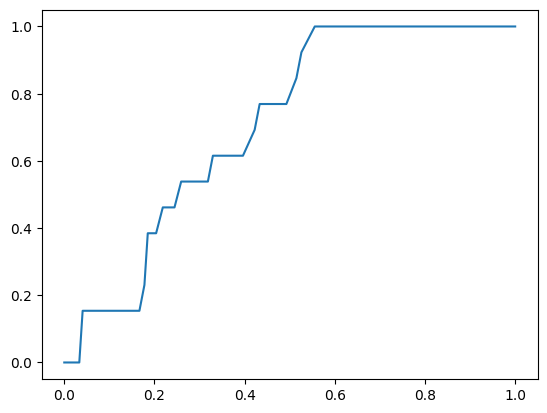

In [14]:
result_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/RF/RF_results/'
full_df = pd.read_csv(result_path+'RF_test_results_all_NEK.csv')

testing = pd.read_csv(result_path+'NEK9_binding_moe_UNDER_RF_BCW_test.csv')
testing
fpr, tpr, _ = metrics.roc_curve(testing['y'],  testing['prob_class1'])
plt.plot(fpr,tpr,label="AUC="+str(auc))

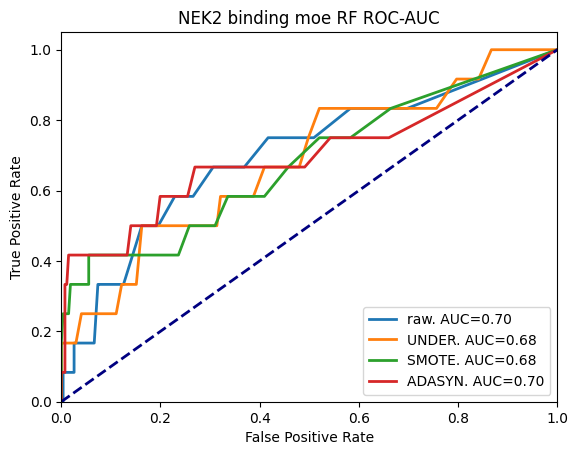

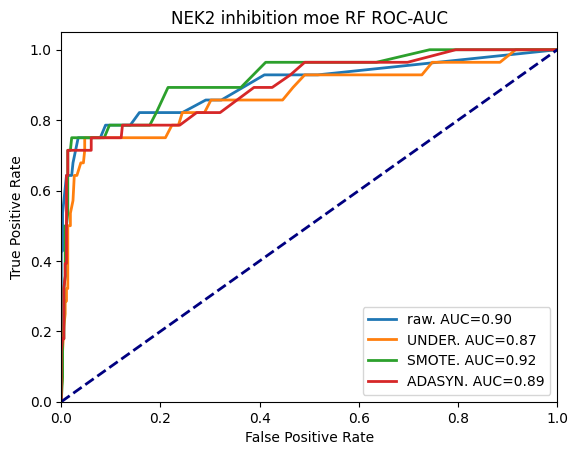

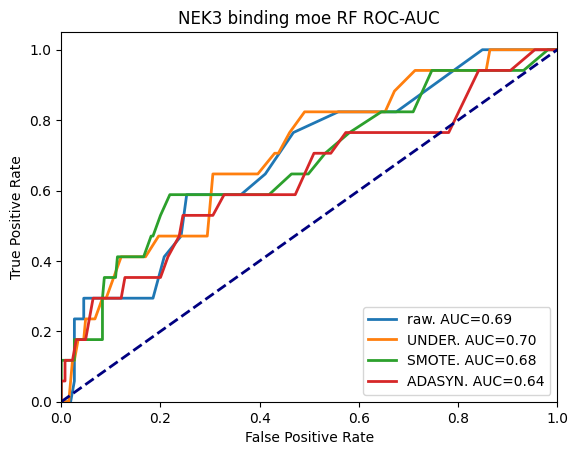

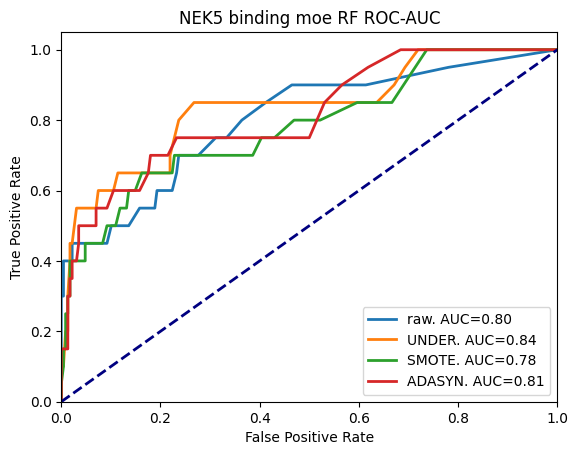

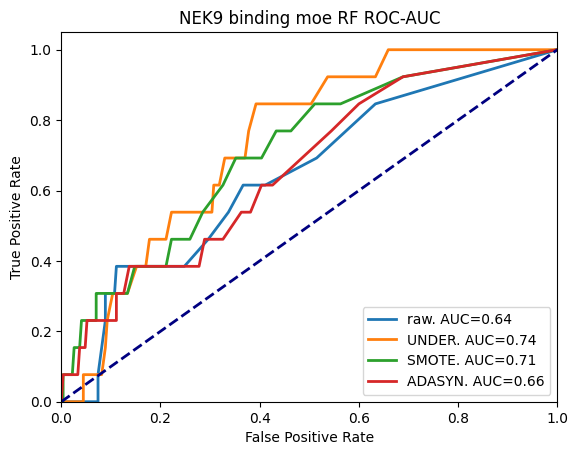

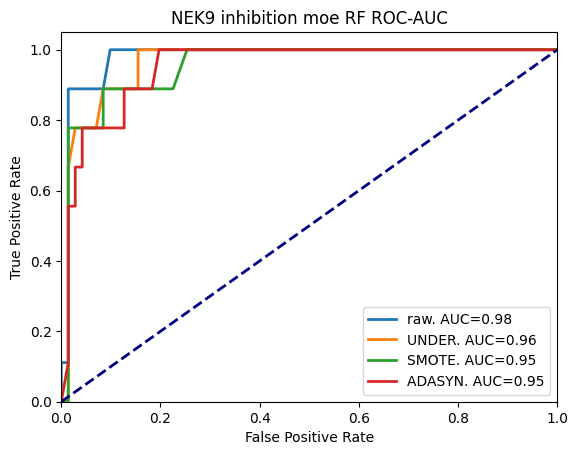

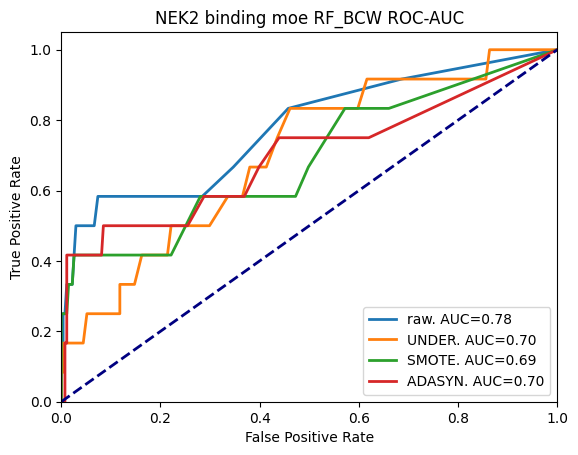

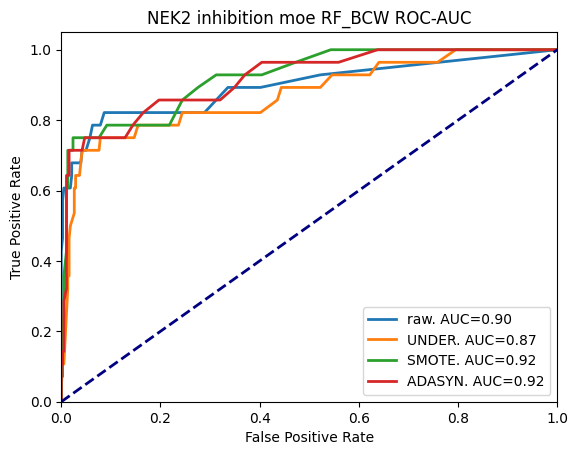

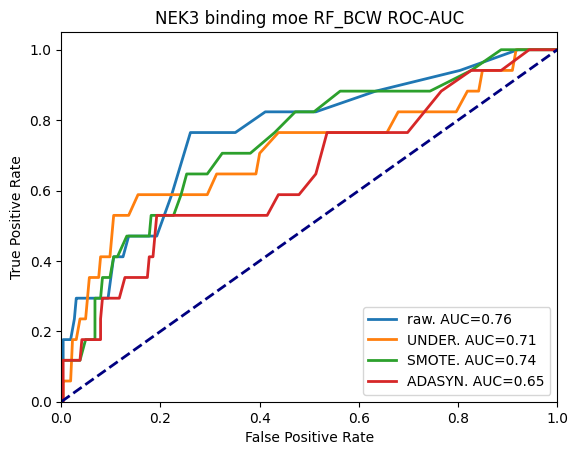

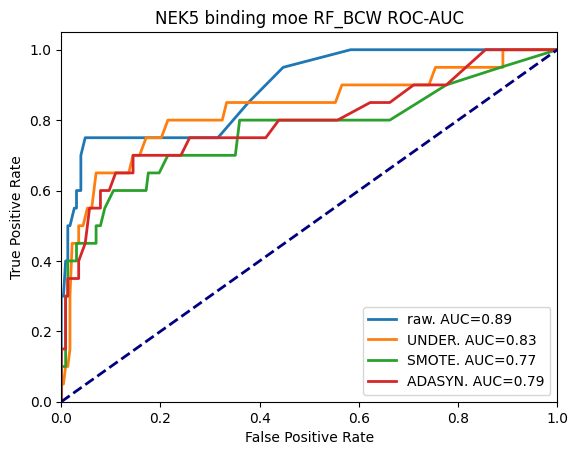

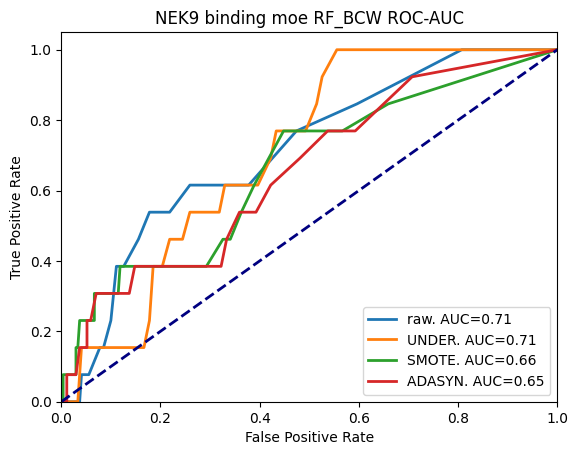

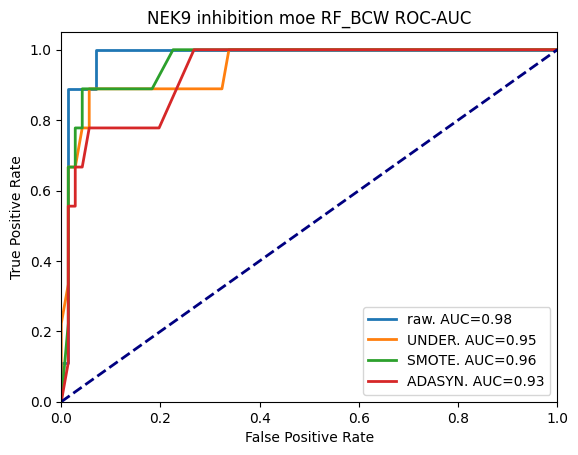

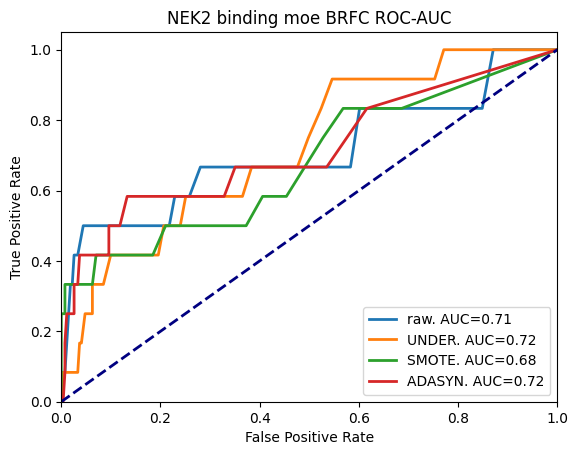

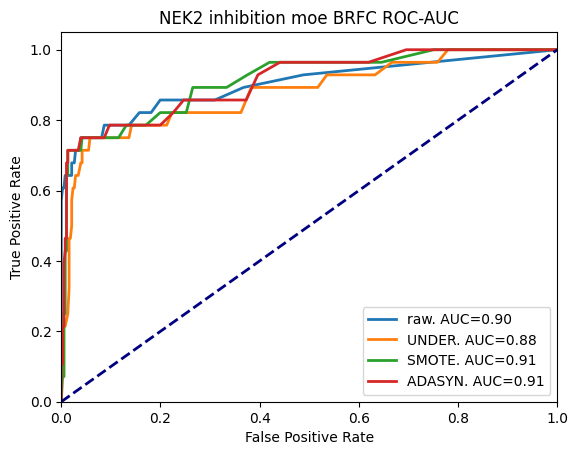

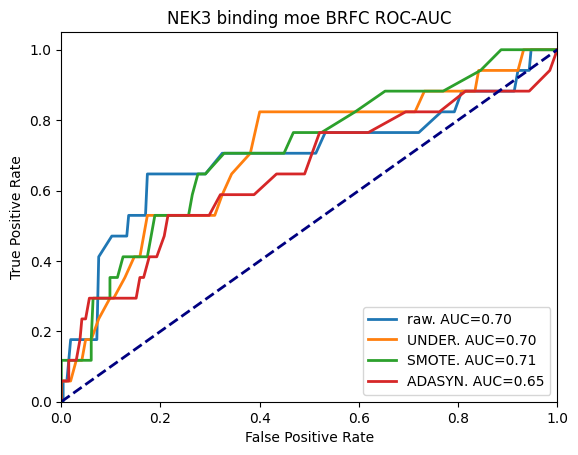

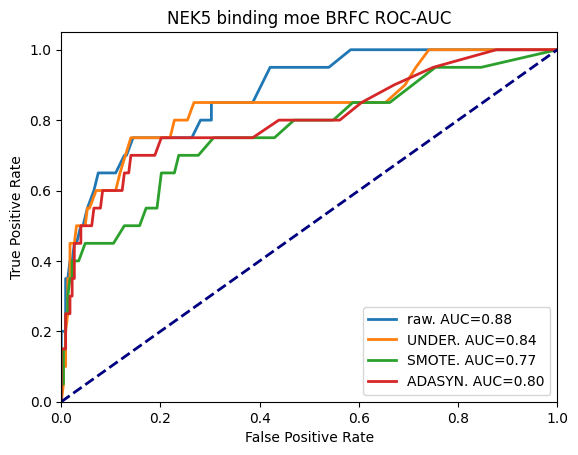

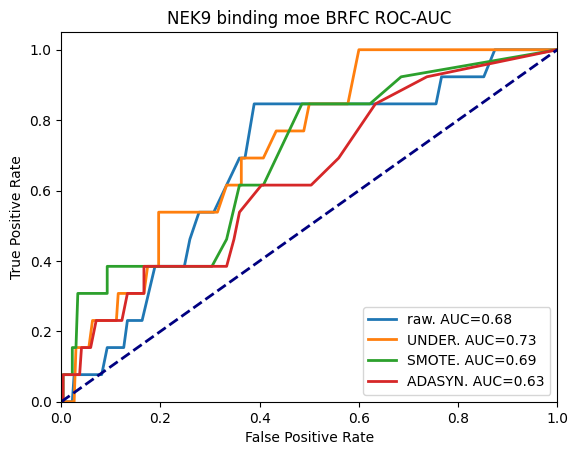

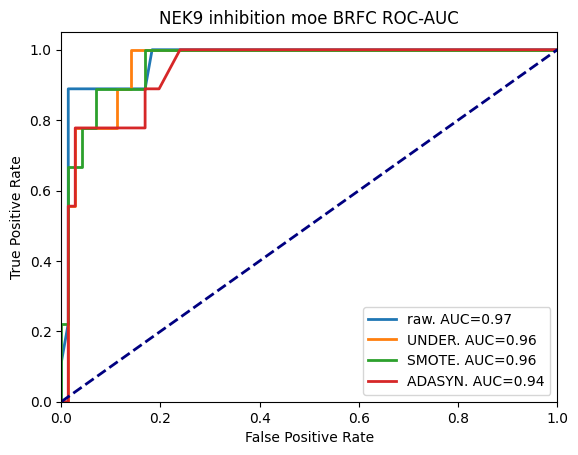

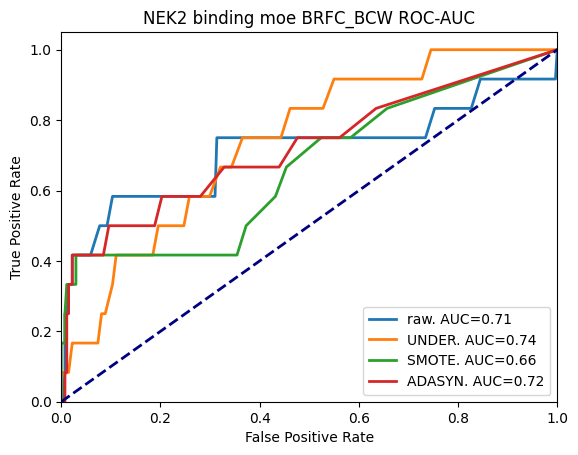

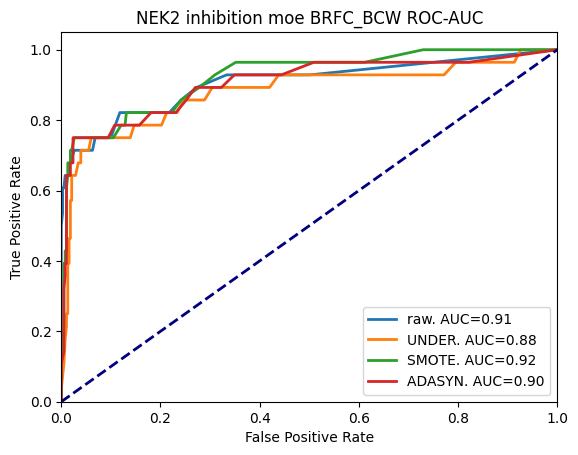

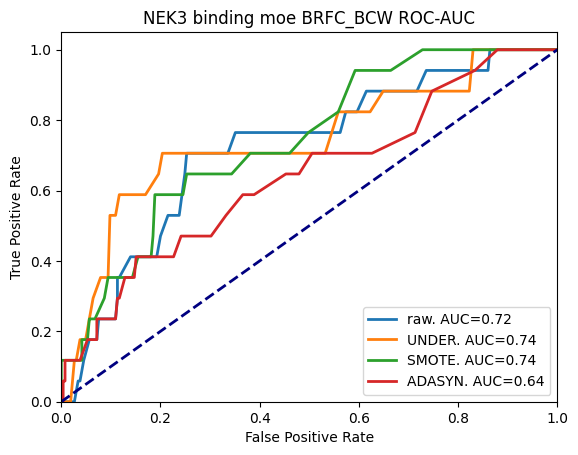

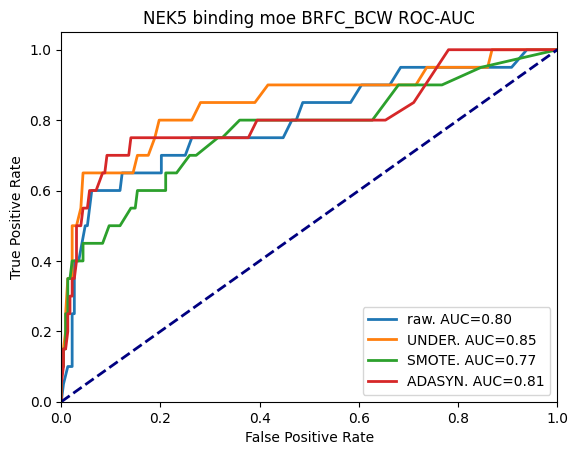

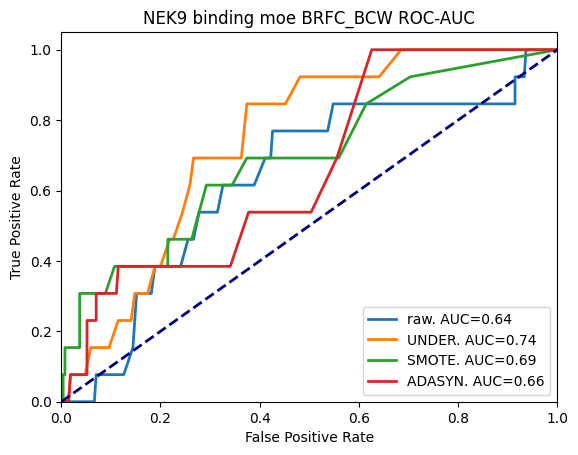

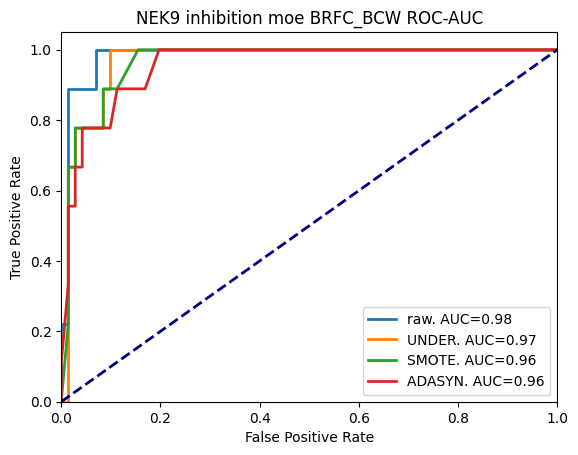

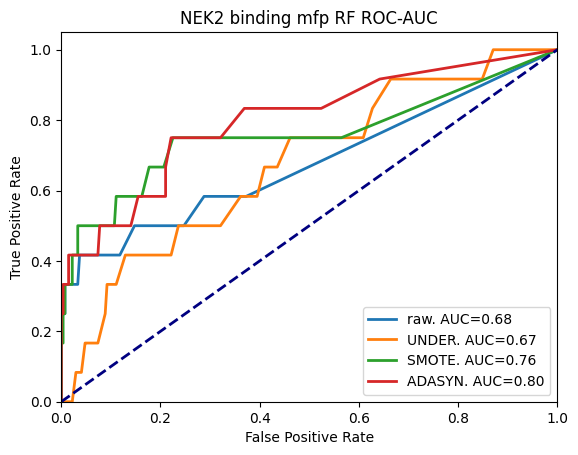

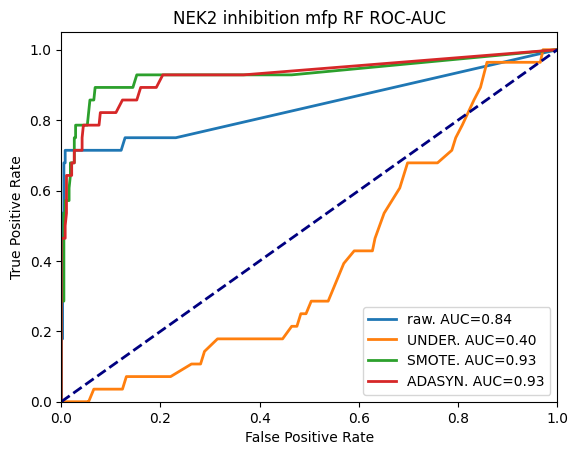

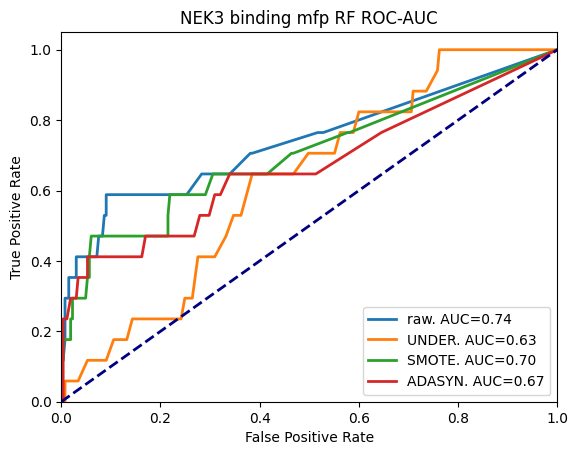

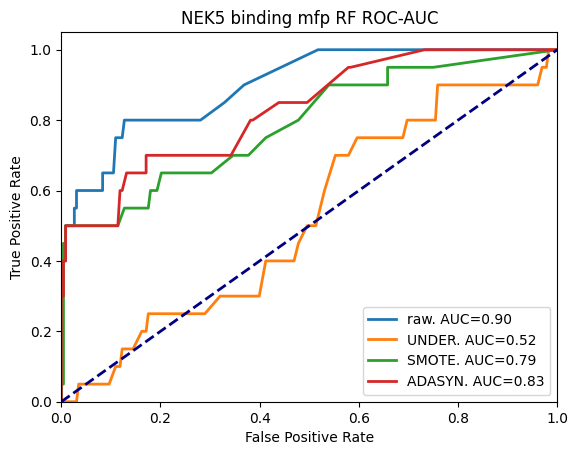

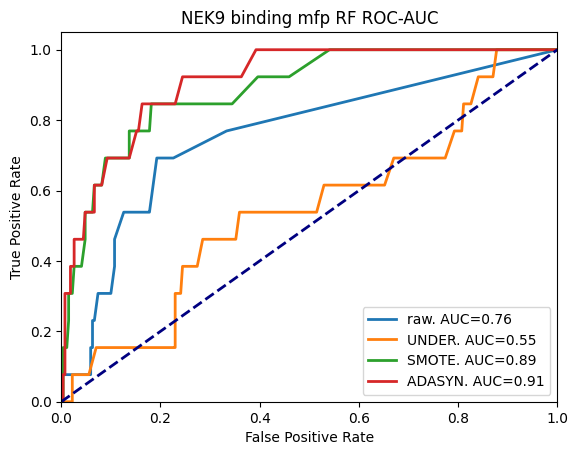

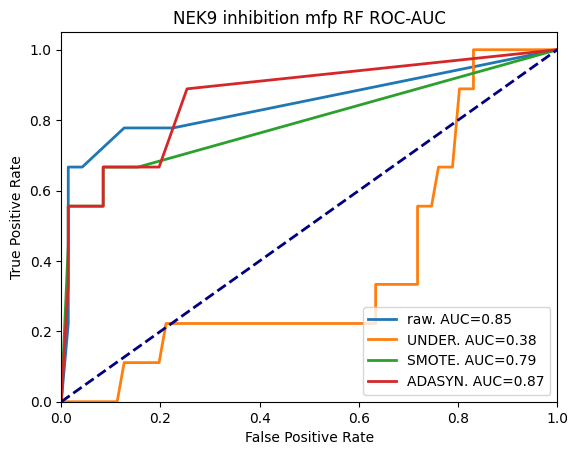

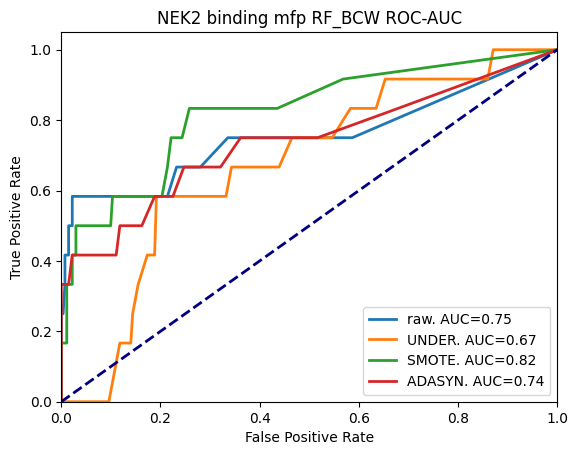

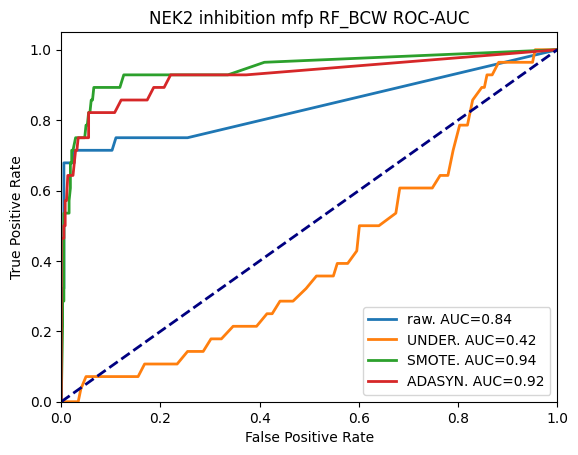

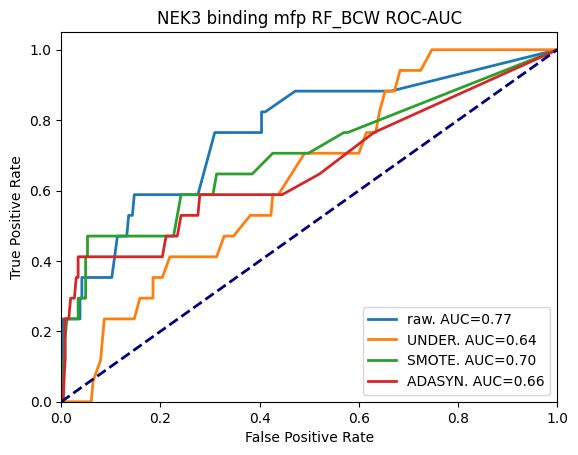

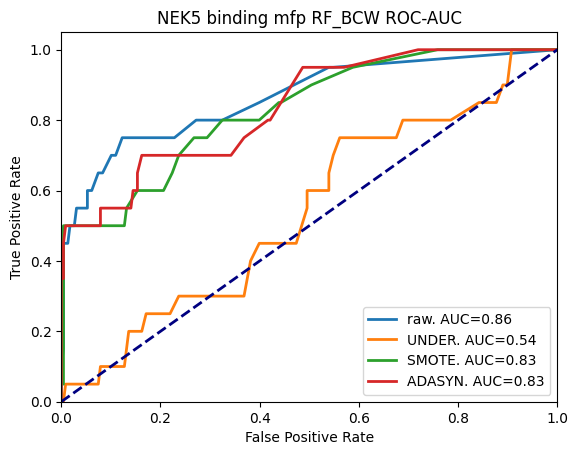

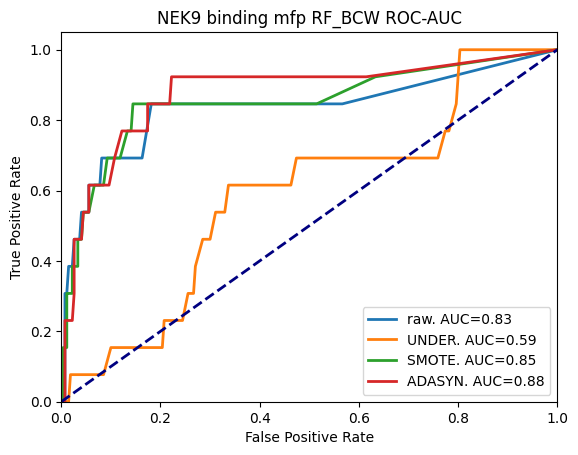

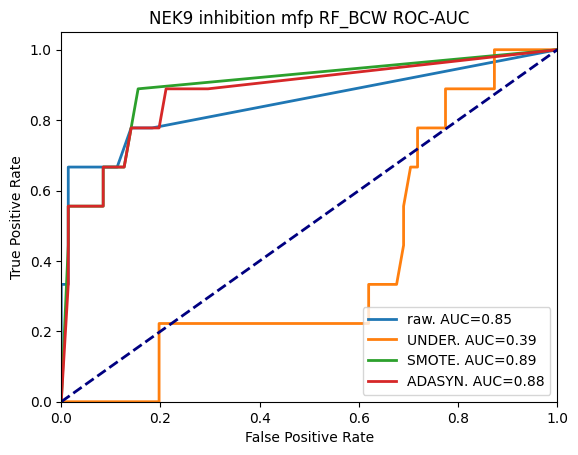

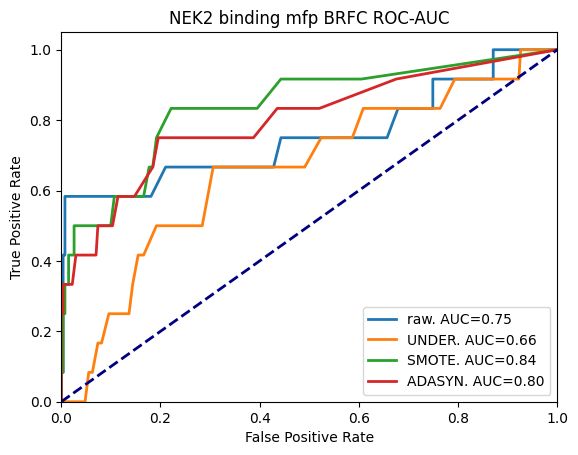

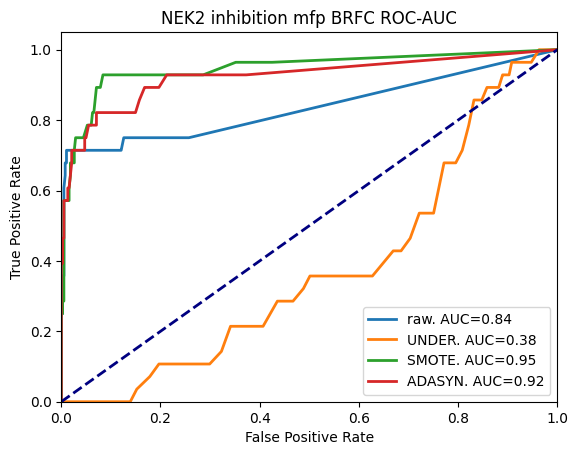

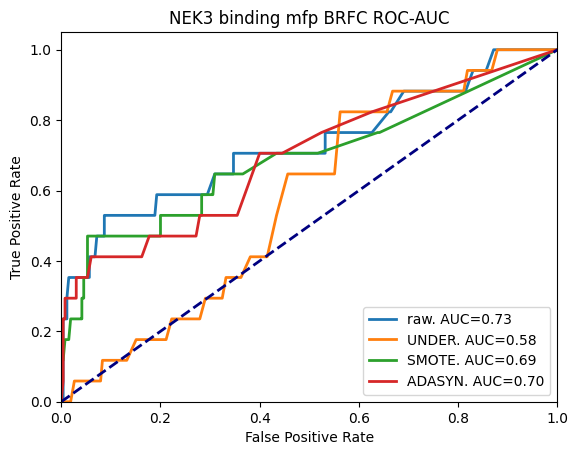

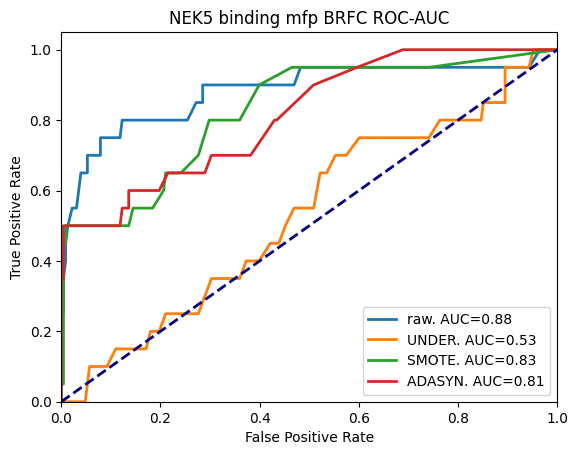

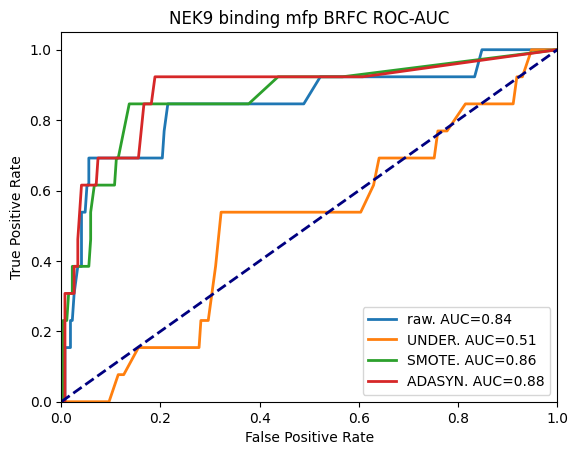

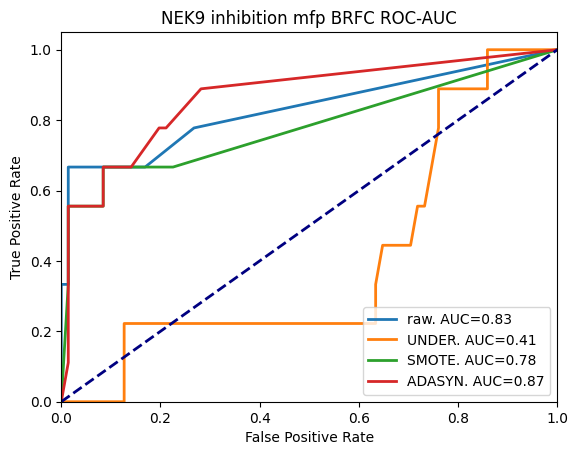

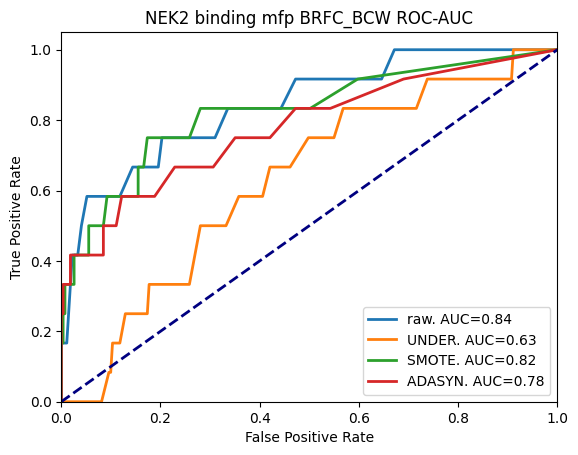

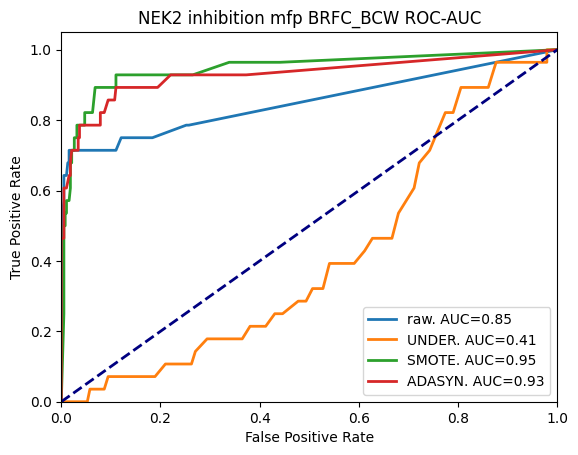

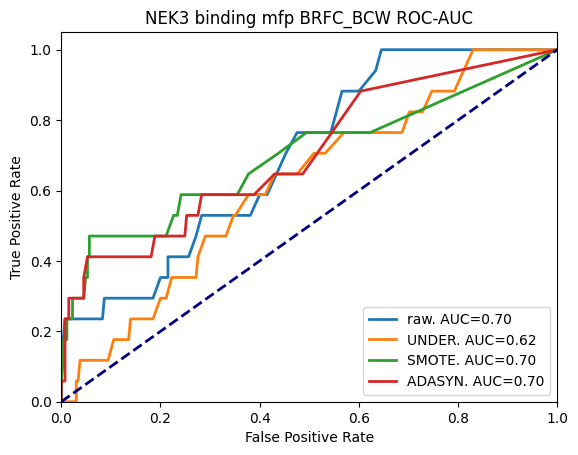

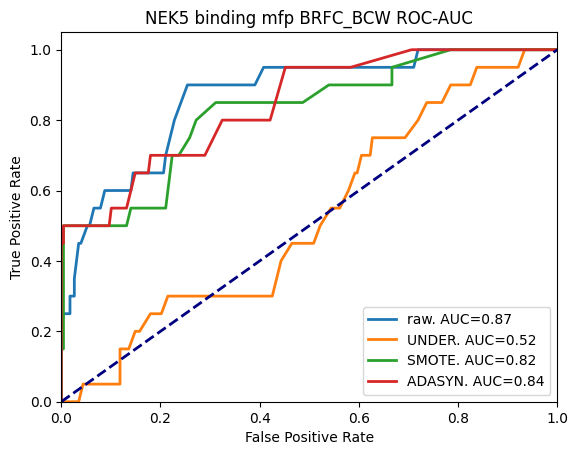

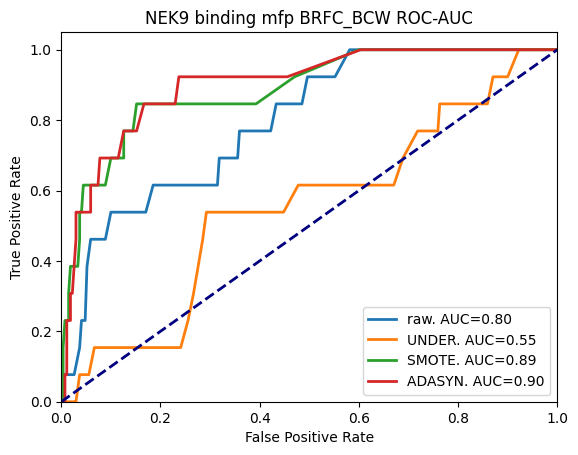

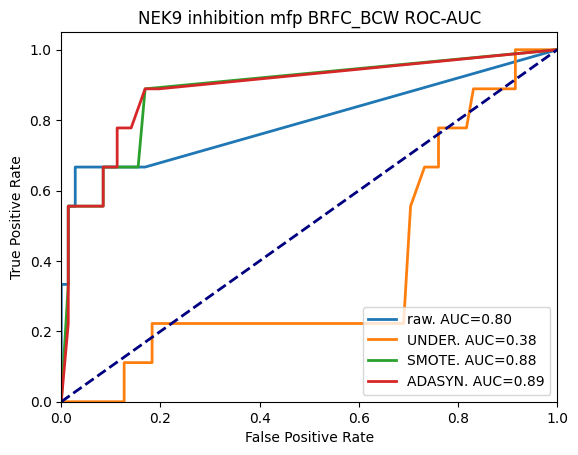

In [33]:
samplings = ['scaled', 'UNDER', 'SMOTE', 'ADASYN']
RF_types = ['RF', 'RF_BCW', 'BRFC', 'BRFC_BCW'] 
feat_types = ['moe', 'mfp']
figure_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/plots/figures/RF_plots/ROC_AUC/individ/'
for feat in feat_types: 
    for rf in RF_types: 
        for nek in ['2', '3', '5', '9']: 
            if nek in ['3', '5']:
                bind_inhib = ['binding']
            else: 
                bind_inhib = ['binding', 'inhibition'] 
            for bi in bind_inhib: 
                plt.figure() 
                for samp in samplings: 
                    
        
                        
                    df = pd.read_csv(f'{result_path}NEK{nek}_{bi}_{feat}_{samp}_{rf}_test.csv')
                    
                    fpr,tpr, thresholds = roc_curve( df['y'], df['prob_class1'])
                    roc_auc = auc(fpr, tpr)
                    if samp == 'scaled': 
                        samp = 'raw' 
                    
                    plt.plot(fpr, tpr, lw=2, label= f'{samp}. AUC={roc_auc:.2f}')
                plt.plot([0, 1],[0, 1], color='navy', lw=2, linestyle='--')
                plt.xlim([0.0, 1.0])
                plt.ylim([0.0, 1.05])
                plt.xlabel('False Positive Rate')
                plt.ylabel('True Positive Rate')
                plt.title(f'NEK{nek} {bi} {feat} {rf} ROC-AUC')
                plt.legend(loc="lower right")
                plt.savefig(f'{figure_path}NEK{nek}_{bi}_{feat}_{rf}_ROCAUC.png')
                plt.show();
                if samp == 'raw': 
                    samp = 'scaled'